In [2]:
import geopandas as gpd
import pandas as pd
import shapely as shp
import pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
import numpy as np
import statsmodels.api as sm
import time
#import tqdm.notebook as tqdm

def plot(X,Y,label = None):
    plt.figure(figsize=(20,10))
    for i in range(len(X)) :
        plt.plot(X[i],Y[i],label = label[i])
    plt.legend()


dataf = pd.read_csv('1hour_data.csv')

del dataf['Districts']
del dataf['Region']
del dataf['avg_vel']
dataf['Coordinate'] = list(zip(dataf.lat,dataf.lon))
dataf['Coordinate'] = dataf['Coordinate'].apply(shp.geometry.Point)
del dataf['lat']
del dataf['lon']
dataf

,Unnamed: 0,datetime,ID,Coordinate
0,1109804,2017-10-13 02:00:00,1126764135,POINT (4.375637999999999 50.87987)
1,1371198,2017-10-13 02:00:00,1011799234,POINT (4.413993 50.90636)
2,1188032,2017-10-13 02:00:00,2801283559,POINT (4.325358 50.84129)
3,1039724,2017-10-13 02:00:00,523571721,POINT (4.467111 50.8375)
4,1397632,2017-10-13 02:00:00,261124976,POINT (4.408221 50.90942)
5,574656,2017-10-13 02:00:00,4071387884,POINT (4.373549 50.87717)
6,934699,2017-10-13 02:00:00,1370515358,POINT (4.374074 50.87154)
7,1039642,2017-10-13 02:00:00,2195290073,POINT (4.371304 50.87773)
8,1738860,2017-10-13 02:00:00,797983548,POINT (4.35656 50.8318)
9,1240530,2017-10-13 02:00:00,3840725634,POINT (4.327366 50.8422)


I modified the dataframe in order to change the columns lat and lon for a column Coordinate which is the Serie of the Points in the geometric structure (shp.geometry).

In [3]:
Pol = shp.geometry.Polygon(zip([4.342088,4.342978 ,4.338575 ,4.337066 ],[50.834637,50.834662,50.847797,50.847548]))
point = shp.geometry.Point(0,0)
Geodist = (gpd.GeoSeries(dataf['Coordinate'])).distance(Pol)
dataf['Intheparking'] = Geodist.eq(0)
dataf

,Unnamed: 0,datetime,ID,Coordinate,Intheparking
0,1109804,2017-10-13 02:00:00,1126764135,POINT (4.375637999999999 50.87987),False
1,1371198,2017-10-13 02:00:00,1011799234,POINT (4.413993 50.90636),False
2,1188032,2017-10-13 02:00:00,2801283559,POINT (4.325358 50.84129),False
3,1039724,2017-10-13 02:00:00,523571721,POINT (4.467111 50.8375),False
4,1397632,2017-10-13 02:00:00,261124976,POINT (4.408221 50.90942),False
5,574656,2017-10-13 02:00:00,4071387884,POINT (4.373549 50.87717),False
6,934699,2017-10-13 02:00:00,1370515358,POINT (4.374074 50.87154),False
7,1039642,2017-10-13 02:00:00,2195290073,POINT (4.371304 50.87773),False
8,1738860,2017-10-13 02:00:00,797983548,POINT (4.35656 50.8318),False
9,1240530,2017-10-13 02:00:00,3840725634,POINT (4.327366 50.8422),False


I created a polygon which represent "Boulevard Poincaré" and the I tested if the points are within the polygon by computing the distance to the polygon and testing if the distance is 0. (May not be the most efficient way)

In [4]:
df = dataf.pivot(index = 'ID', columns = 'datetime', values = 'Intheparking')
df

datetime,2017-10-13 02:00:00,2017-10-13 03:00:00,2017-10-13 04:00:00,2017-10-13 05:00:00,2017-10-13 06:00:00,2017-10-13 07:00:00,2017-10-13 08:00:00,2017-10-13 09:00:00,2017-10-13 10:00:00,2017-10-13 11:00:00,...,2017-11-18 05:00:00,2017-11-18 06:00:00,2017-11-18 07:00:00,2017-11-18 08:00:00,2017-11-18 09:00:00,2017-11-18 10:00:00,2017-11-18 11:00:00,2017-11-18 12:00:00,2017-11-18 13:00:00,2017-11-18 14:00:00
ID,,,,,,,,,,,,,,,,,,,,,
32495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I created a new data frame with the different time as columns and the diffenrent ID as rows. My assumption is that each element in $ID\times Datetime$ appears at most once.

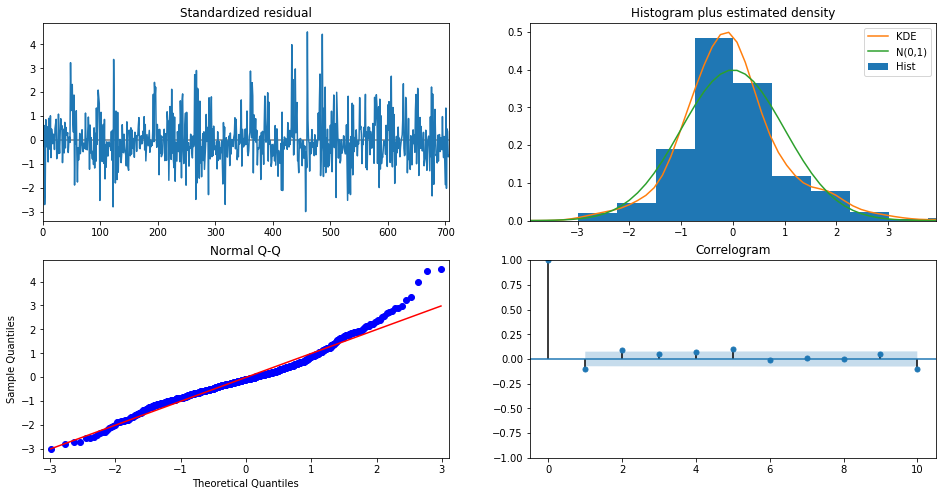

In [5]:
yy = df.apply(pd.value_counts).fillna(0)
y = list(yy.iloc[1])
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
results.plot_diagnostics(figsize=(16, 8))
plt.show()

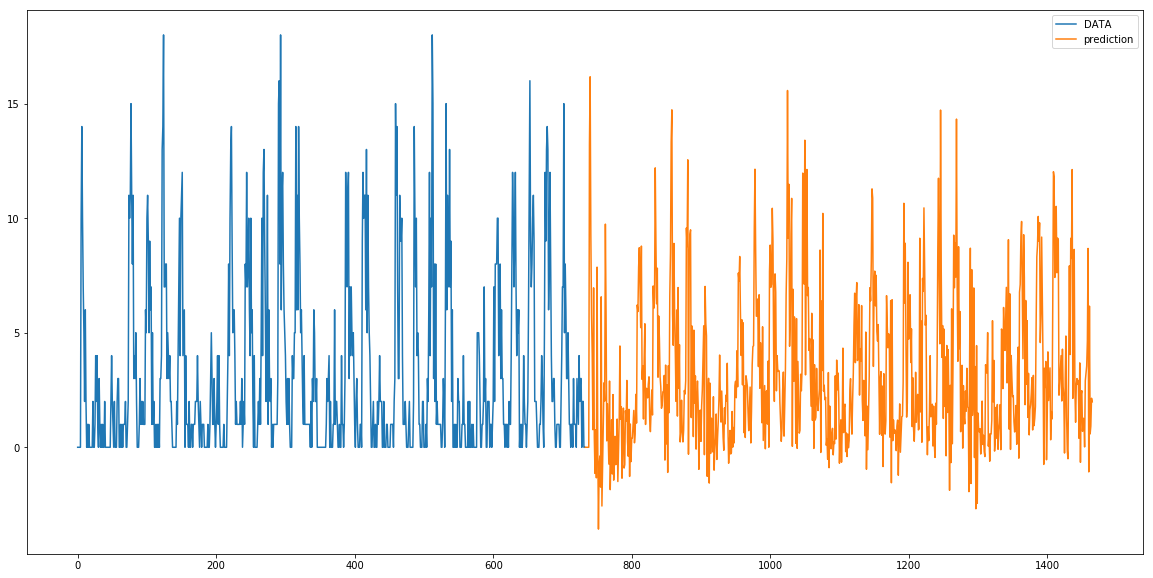

In [82]:
pred = results.get_prediction()
pred_ci = pred.conf_int()
B = pred.predicted_mean
X = [i for i in range(len(B))]
XX = [i for i in range(len(B),len(B) + len(y))]
plot([X,XX],[y,list(B)],['DATA','prediction'])

In [6]:
result = yy
result


datetime,2017-10-13 02:00:00,2017-10-13 03:00:00,2017-10-13 04:00:00,2017-10-13 05:00:00,2017-10-13 06:00:00,2017-10-13 07:00:00,2017-10-13 08:00:00,2017-10-13 09:00:00,2017-10-13 10:00:00,2017-10-13 11:00:00,...,2017-11-18 05:00:00,2017-11-18 06:00:00,2017-11-18 07:00:00,2017-11-18 08:00:00,2017-11-18 09:00:00,2017-11-18 10:00:00,2017-11-18 11:00:00,2017-11-18 12:00:00,2017-11-18 13:00:00,2017-11-18 14:00:00
False,21.0,50.0,110.0,180.0,304.0,2124,2107,1976,1749,1641,...,539,573,522,477,417,379.0,311,284,226.0,85.0
True,0.0,0.0,0.0,0.0,0.0,10,14,10,7,5,...,1,4,2,3,3,0.0,2,2,0.0,0.0


Finally we have the series of the times step with the number of trucks in the polygon that we want.

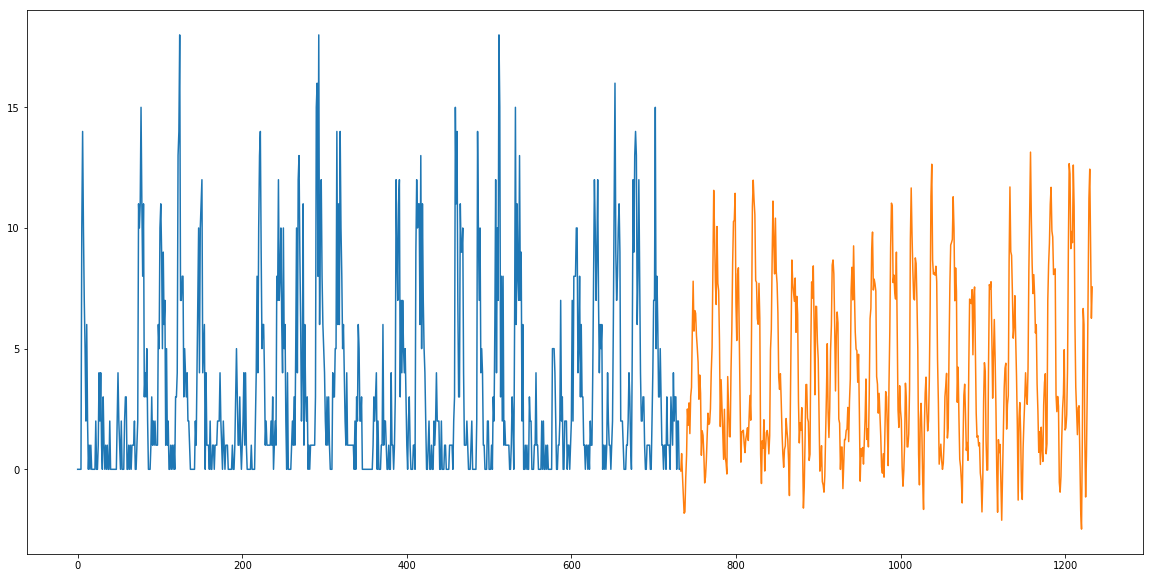

In [7]:
fordata = list(result.iloc[1])
model = AR(fordata)
model_fit = model.fit(600)
yhat = model_fit.predict(len(fordata),len(fordata)+500)
X = [x for x in range(len(fordata))]
XX = [x for x in range(len(fordata),len(fordata)+501)]
plt.figure(figsize=(20,10))
plt.plot(X,fordata)
plt.plot(XX,yhat)

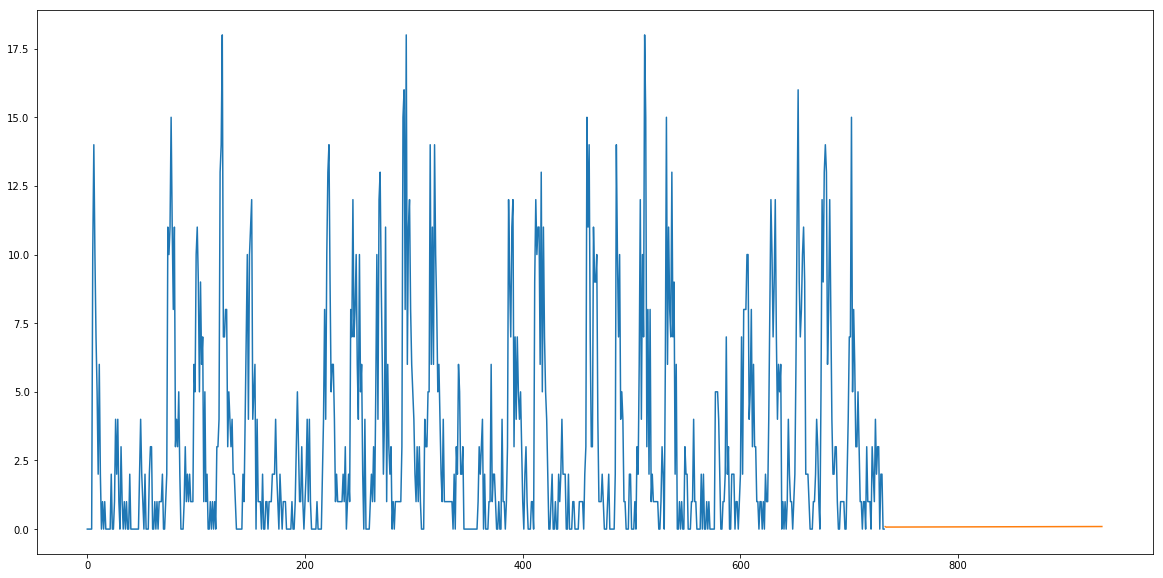

In [33]:
fordata1 = list(result.iloc[1])
model1 = ARIMA(fordata, order =(1,1,1))
model_fit = model1.fit()
yhat1 = model_fit.predict(len(fordata1),len(fordata1)+199,typ ="levels")
X = [x for x in range(len(fordata))]
XX = [x for x in range(len(fordata),len(fordata)+200)]
plt.figure(figsize=(20,10))
plt.plot(X,fordata)
plt.plot(XX,yhat1)

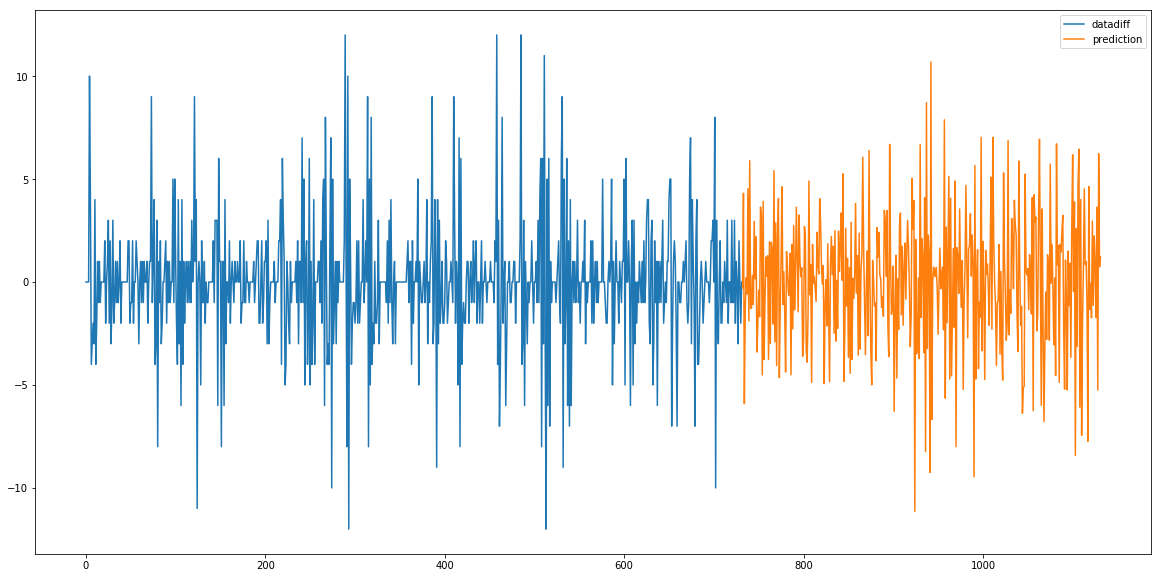

In [26]:
A = list(result.iloc[1])
ddata = [A[i]-A[i-1] for i in range(1,len(A))]
model2 = AR(ddata)
model_fit = model2.fit(500)
yhat2 = model_fit.predict(len(ddata),len(ddata)+399)
X = [x for x in range(len(ddata))]
XX = [x for x in range(len(ddata),len(ddata)+400)]
plot([X,XX],[ddata,yhat2],label=['datadiff','prediction'])


D:\program\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


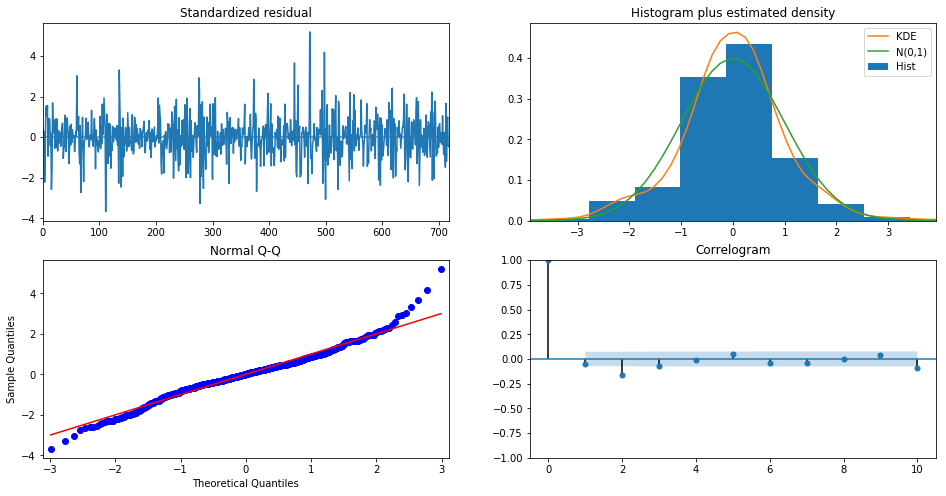

In [95]:
A = list(yy.iloc[1])
alpha = A[0]
ddata = [A[i]-A[i-1] for i in range(1,len(A))]
mod = sm.tsa.statespace.SARIMAX(ddata,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()
results.plot_diagnostics(figsize=(16, 8))
plt.show()

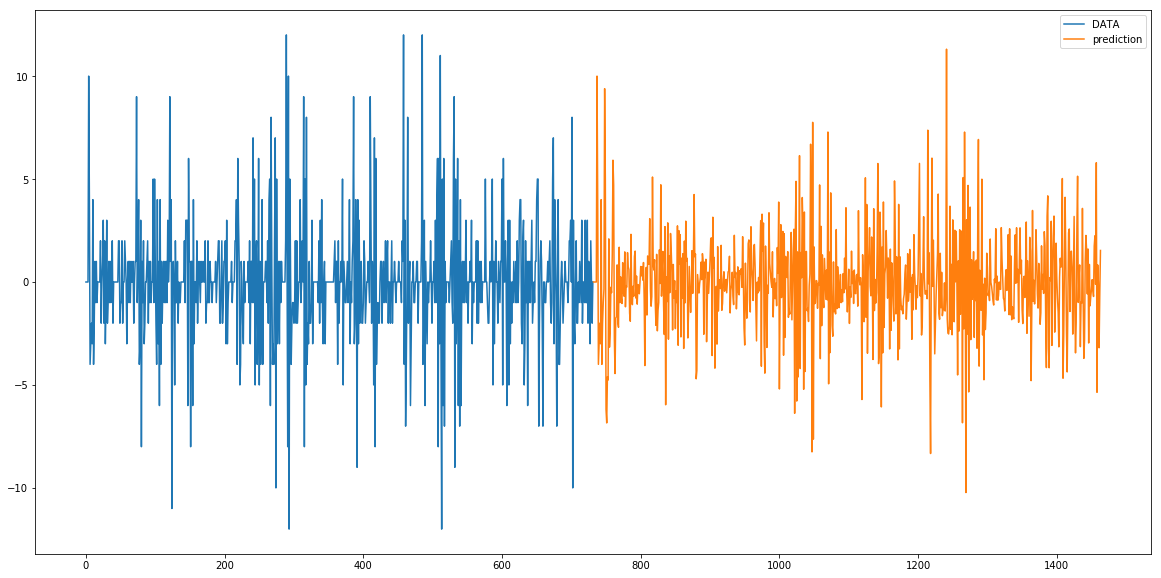

In [96]:
pred = results.get_prediction()
pred_ci = pred.conf_int()
B = pred.predicted_mean
X = [i for i in range(len(B))]
XX = [i for i in range(len(B),len(B) + len(ddata))]
plot([X,XX],[ddata,list(B)],['DATA','prediction'])
C = ddata+list(B)


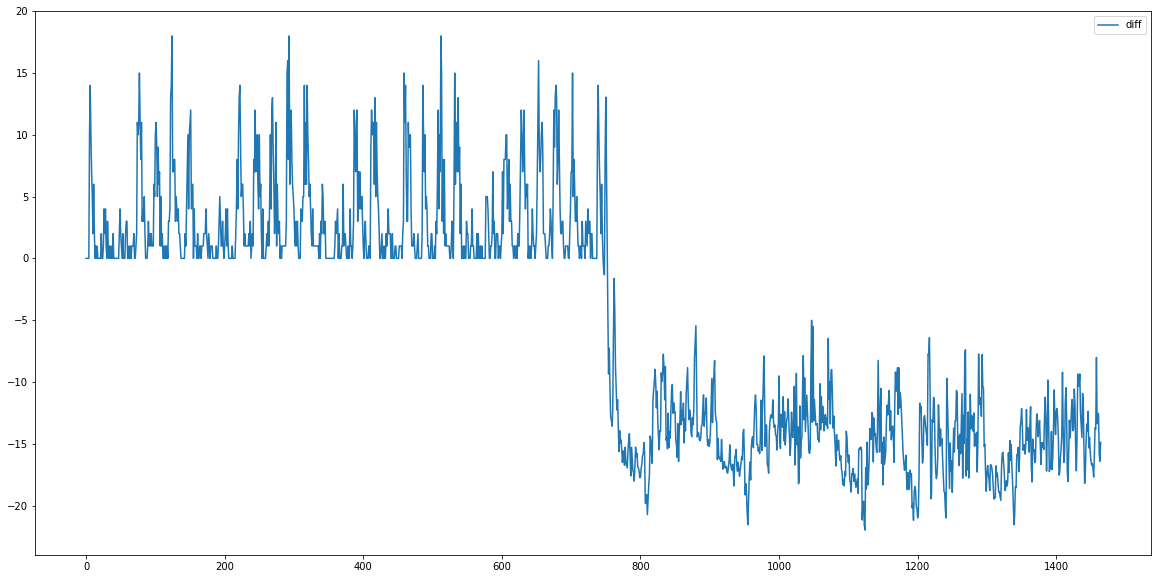

In [97]:
def dedif(alpha,C):
    D=[alpha]
    for x in C :
        D.append(D[-1] + x)
    return(D)

D = dedif(alpha,C)

plot([[i for i in range(len(D))]],[D],['diff'])

In [13]:
dy = [y[i]-y[i-1] for i in range(1,len(y))]

train = y[:500]
test = y[500:]

N = len(dy)

dtrain = dy[:650]
dtest = dy[650:]
Ntrain = len(dtrain)
Ntest = len(dtest)
dmu = np.sum(abs(np.array(dy)))/N
mu = np.sum(np.array(y))/(N+1)
print('mu = %d',mu)
model = AR(dtrain)
model_fit = model.fit()
yhat = model_fit.predict(len(dtrain),len(dy)-1)


print(mu)
def compute_err(yhat, test,mu):
    N = len(test)
    return(np.linalg.norm(np.array(test)-np.array(yhat))/ (N*mu))
print(compute_err(yhat[:12],dtest[:24],mu))
plt.figure(figsize = (20,10))
plt.plot(range(len(yhat[:24])),yhat[:24],label = 'predicted')
plt.plot(range(len(yhat[:24])),dtest[:24], label = 'data')
plt.legend()

mu = %d 3.208731241473397
3.208731241473397


ValueError: operands could not be broadcast together with shapes (24,) (12,) 

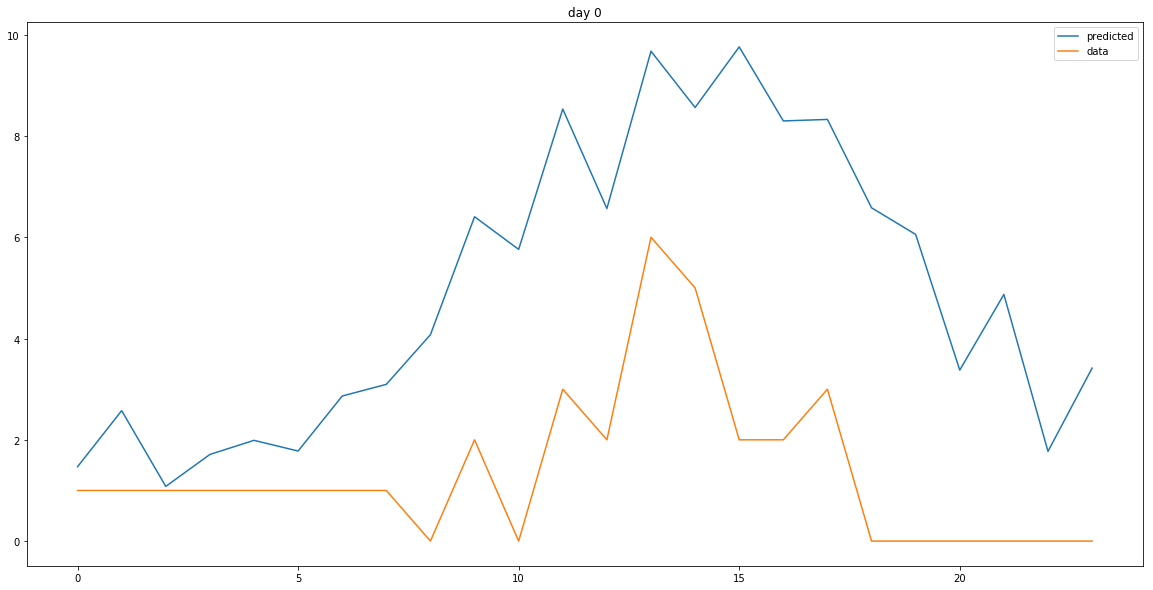

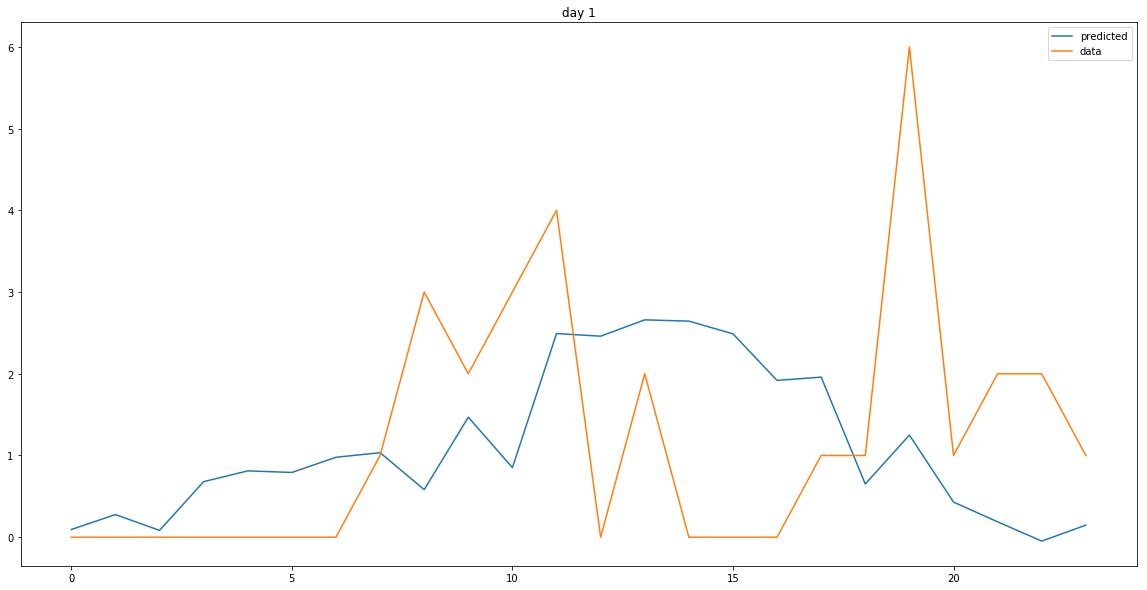

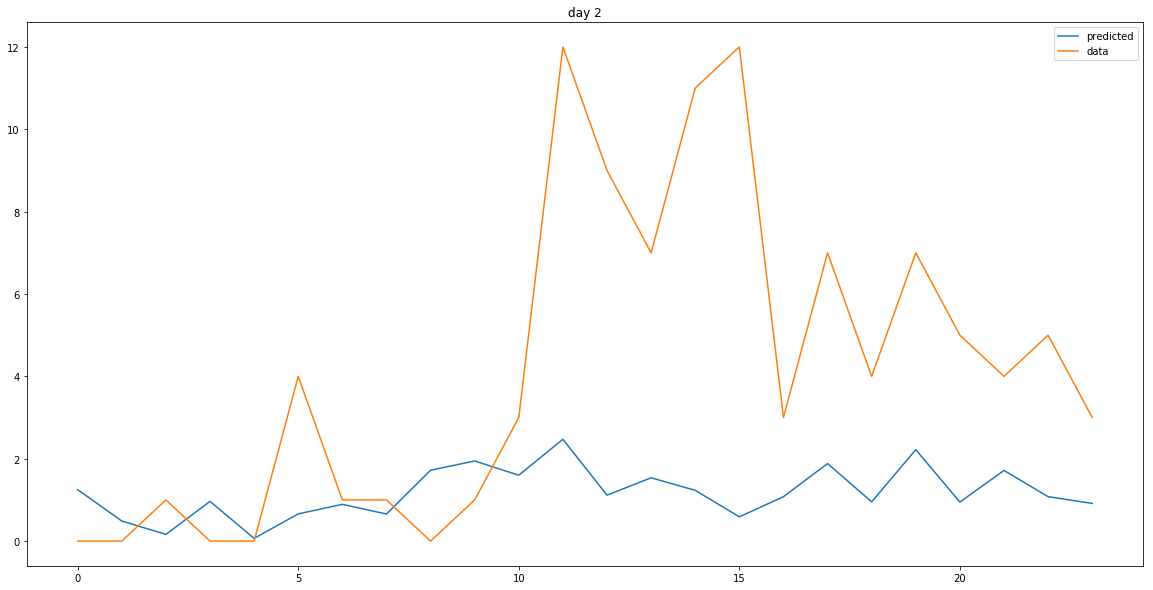

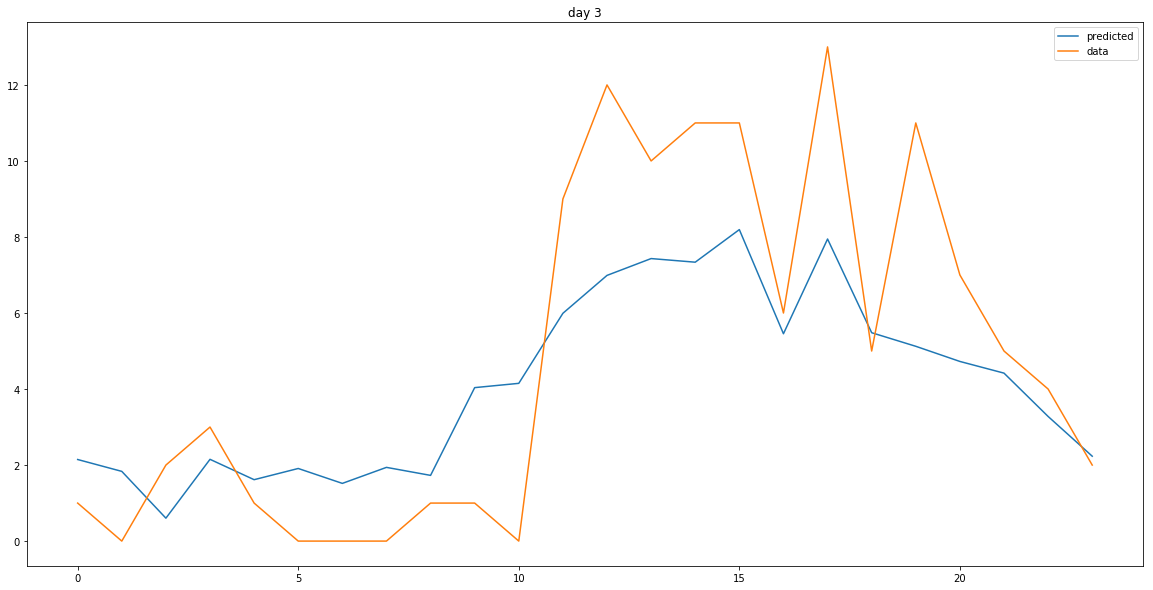

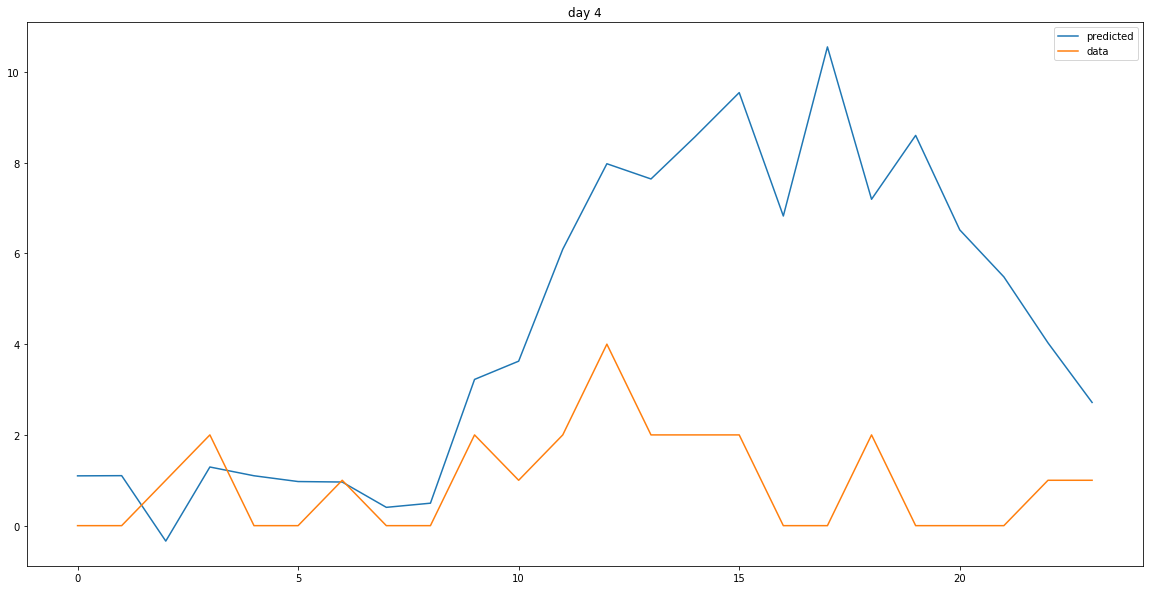

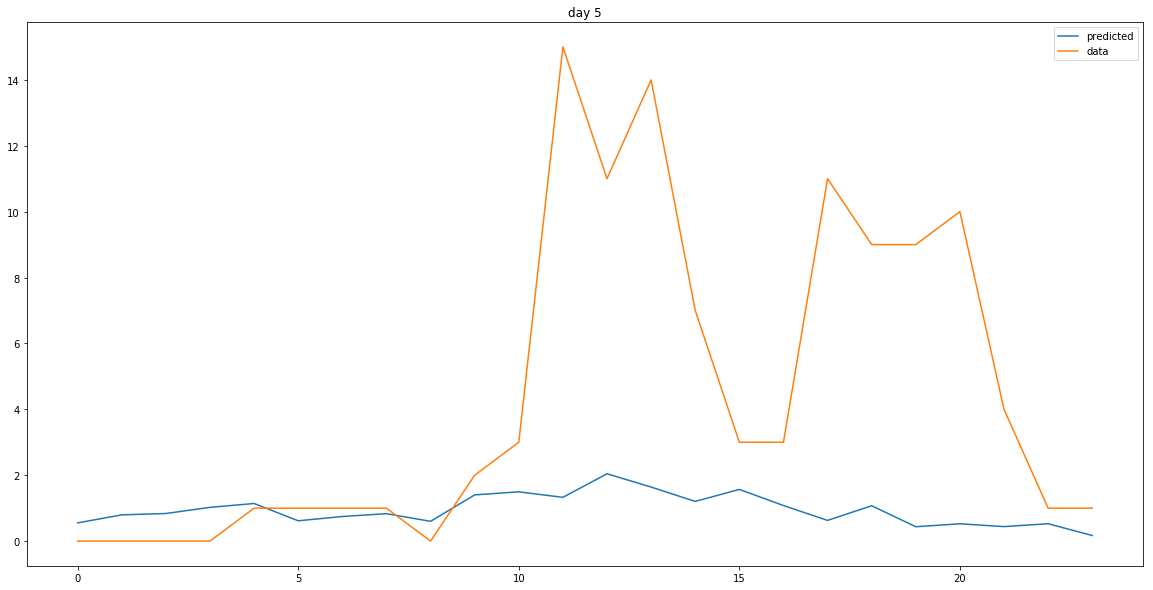

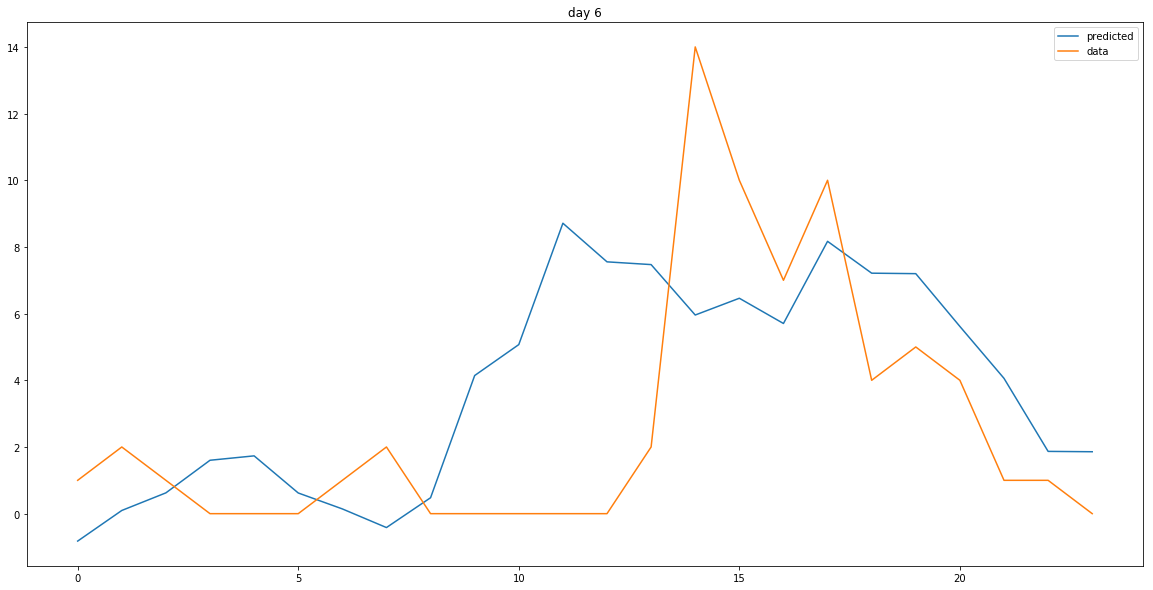

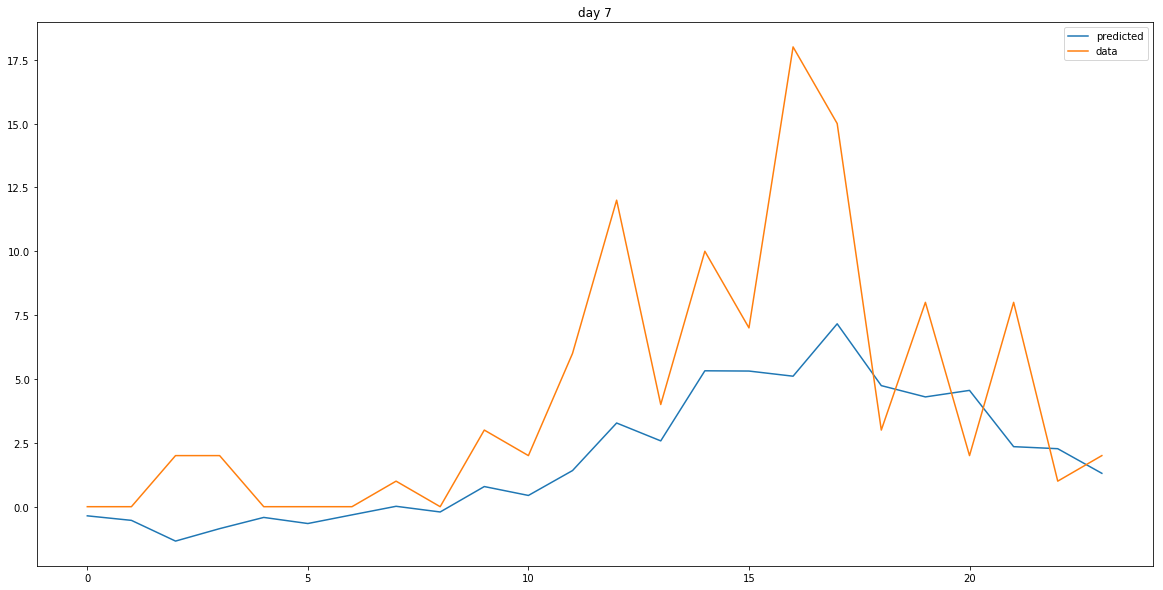

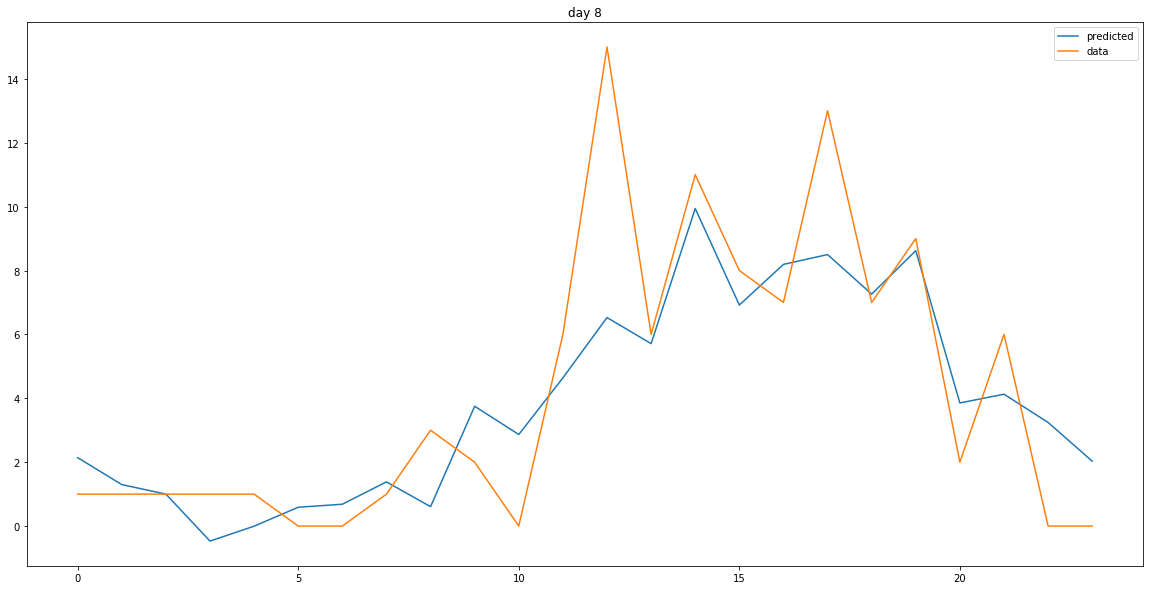

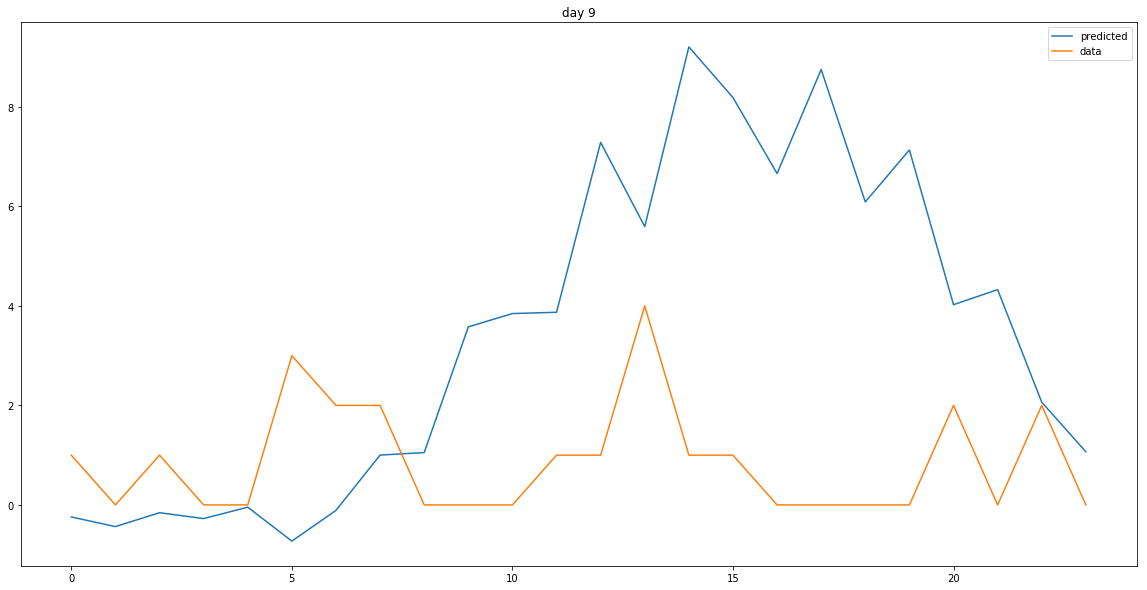

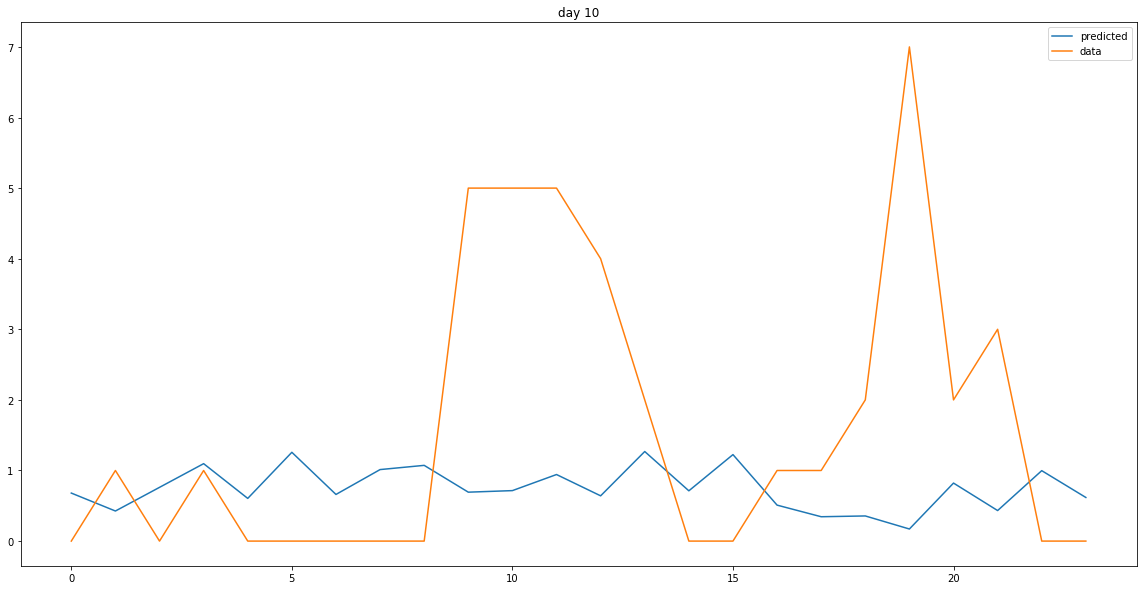

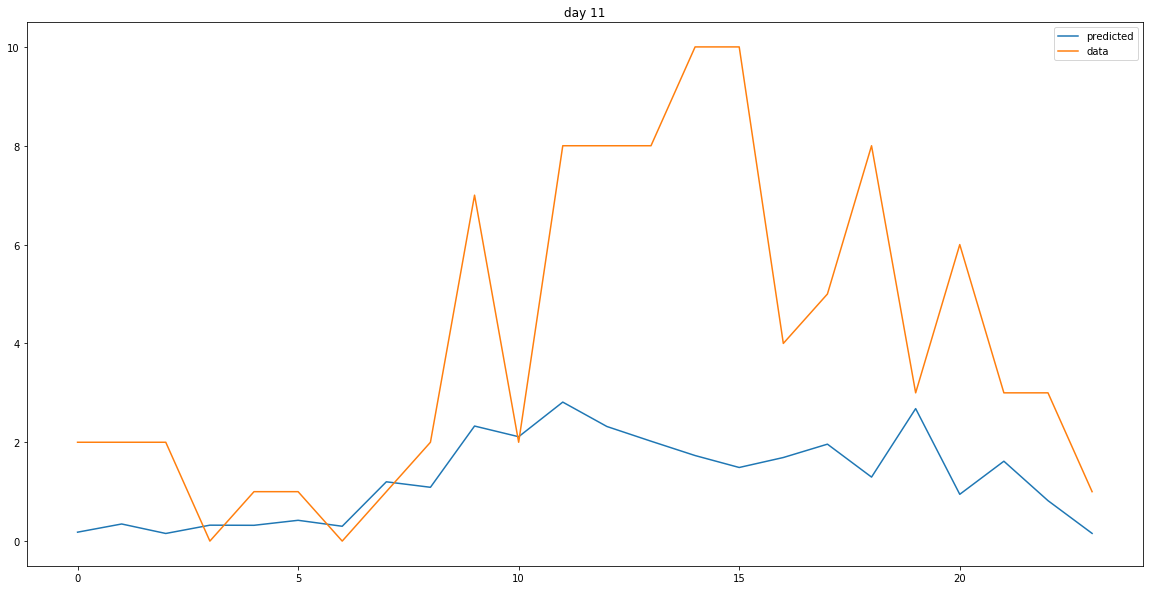

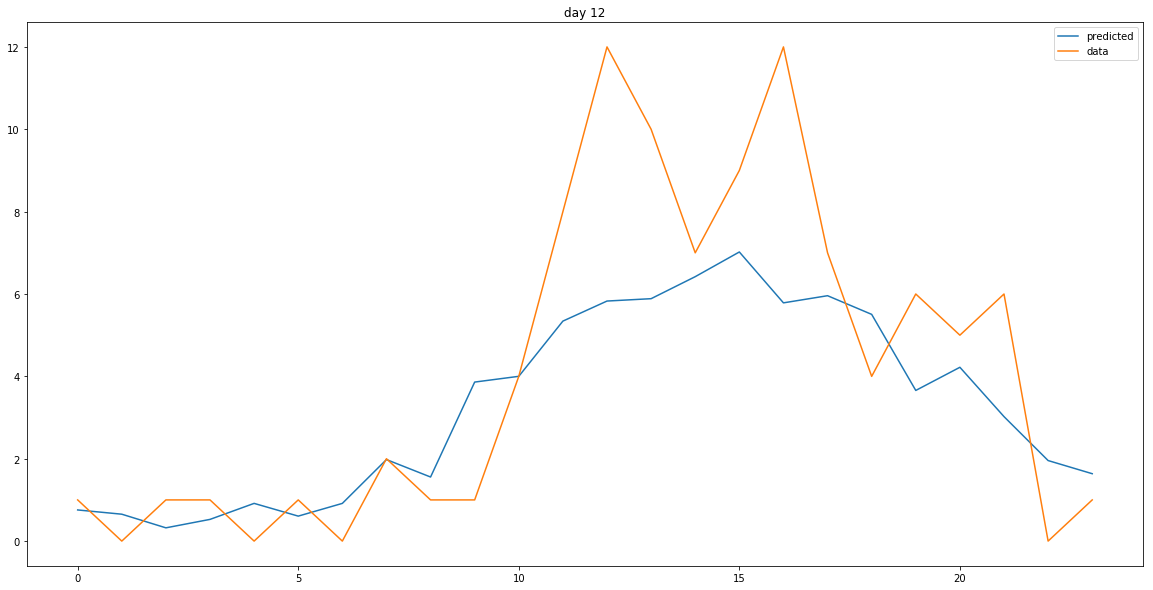

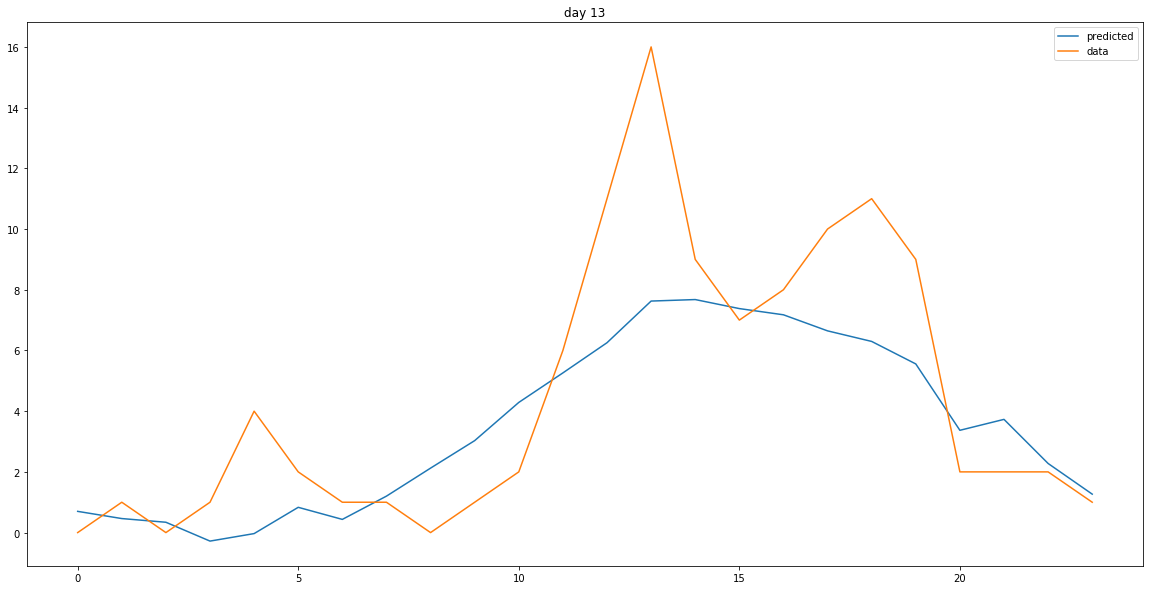

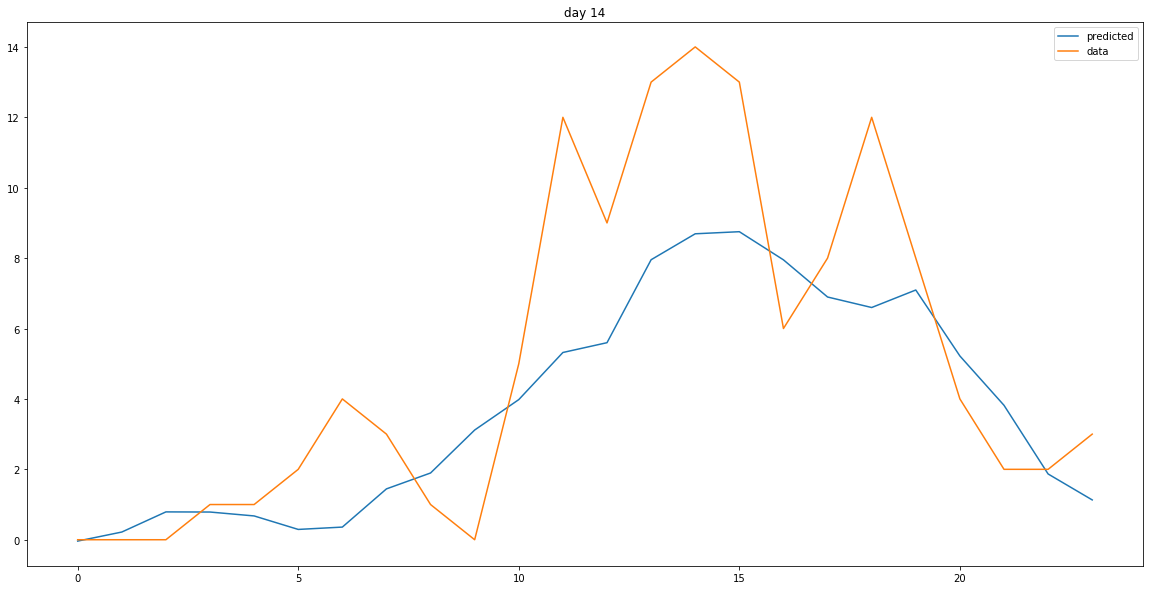

0.2242202211946433


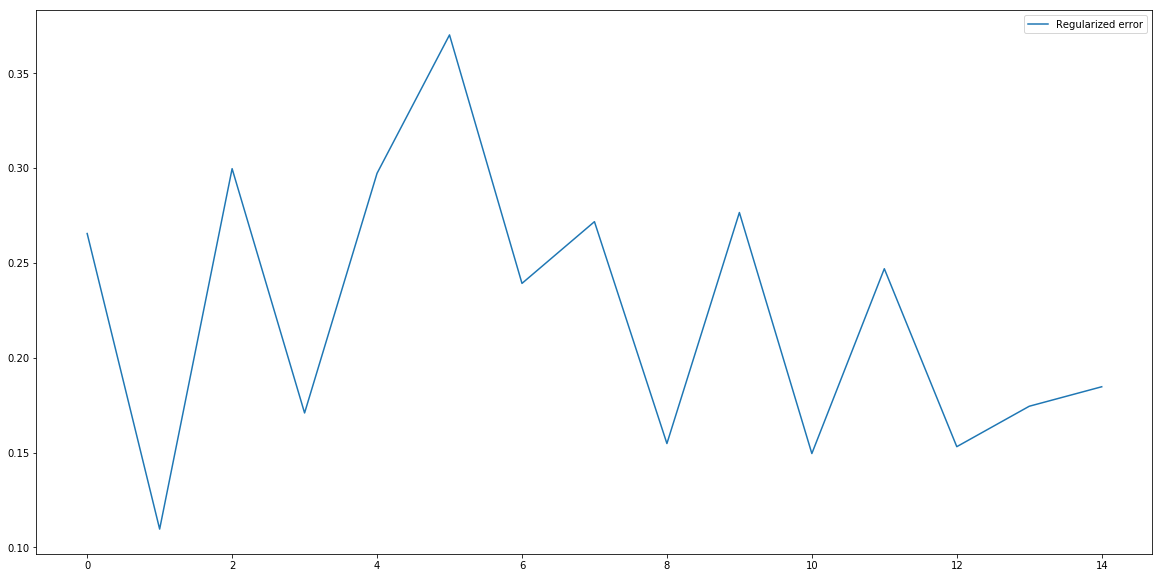

In [152]:
err = []
NN = 15

for i in range(NN) :
    dn = (688-NN*24)+i*24
    train = y[:dn]
    test = y[dn:]
    Ntest = len(test)
    Ntrain = len(train)
    model = AR(train)
    model_fit = model.fit(Ntrain -24)
    yhat = model_fit.predict(len(train),len(y)-1)
    err.append(compute_err(yhat[:24],test[:24],mu))
    plt.figure(figsize = (20,10))
    plt.plot(range(len(yhat[:24])),yhat[:24],label = 'predicted')
    plt.plot(range(len(yhat[:24])),test[:24], label = 'data')
    plt.title('day ' + str(i))
    plt.legend()
    plt.show()
    
print(np.sum(err)/NN)
plt.figure(figsize = (20,10))
plt.plot(range(len(err)),err,label = 'Regularized error')
plt.legend()

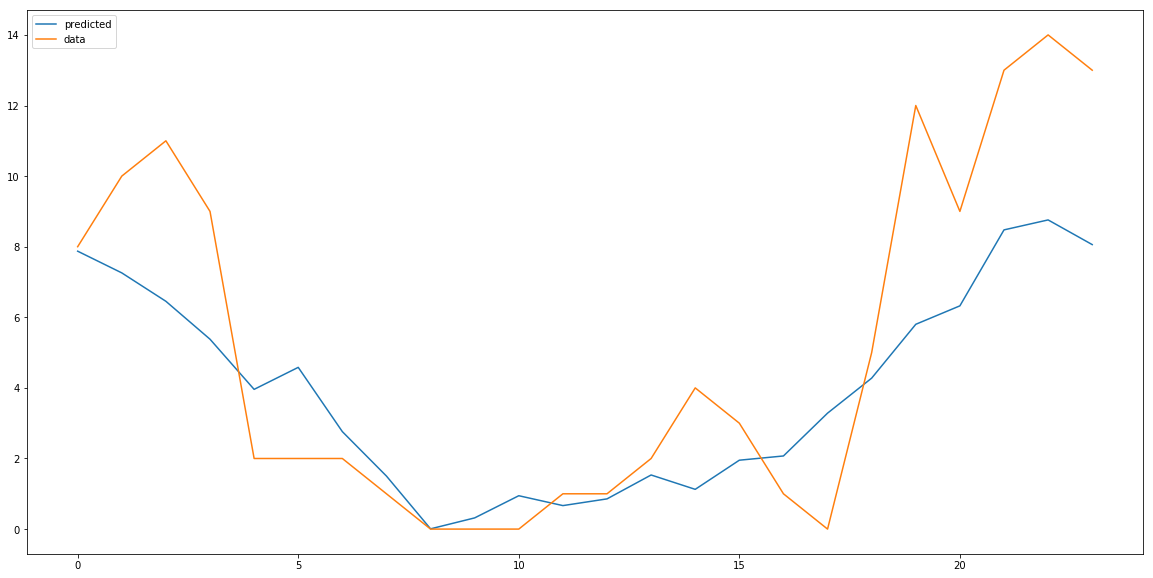

In [141]:
plt.figure(figsize = (20,10))
plt.plot(range(len(yhat[:24])),yhat[:24],label = 'predicted')
plt.plot(range(len(yhat[:24])),test[:24], label = 'data')
plt.legend()

I did 90 24-hours predictions and computed the error the mean error is 0.17 wich correspond to a mean error of 0.5 trucks pert time step. The average number of trucks is 3.2.

0.18875781818297402


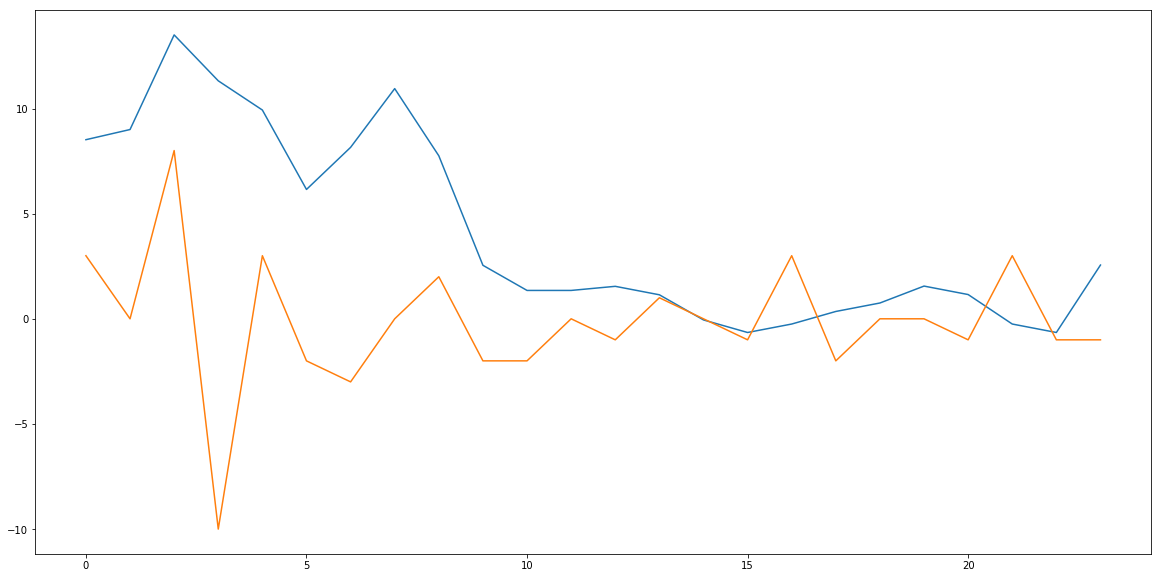

In [116]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
mod_fit = mod.fit()
yhat2 = mod_fit.predict(len(train),len(y)-1)

print(compute_err(yhat2[:12],test[:12]))

plt.figure(figsize = (20,10))
plt.plot(range(len(yhat[:24])),yhat2[:24])
plt.plot(range(len(yhat[:24])),dtest[:24])

In [12]:
def mean(err) :
    N = len(err)
    return(np.sum(np.array(err))/N)
err = []
NN = 15
mean_err = []

for i in range(NN) :
    dn = (688-NN*12)+i*12
    train = y[:dn]
    test = y[dn:]
    Ntest = len(test)
    Ntrain = len(train)
    model = ARIMA(train,order=(500,0,0))
    model_fit = model.fit(disp=  0)
    yhat = model_fit.predict(len(train),len(y)-1)
    err.append(compute_err(yhat[:12],test[:12],mu))
mean_err.append((mean(err),p,q,r))

D:\program\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [20]:
A = [y[i]-y[i-1] for i in range(1,len(y))]
train = A[:600]
test = A[600:]
Ntest = len(test)
Ntrain = len(train)
model = ARIMA(train,order=(5,1,0))
model_fit = model.fit(disp=  0)
yhat = model_fit.predict(len(train),len(A)-1)

D:\program\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\program\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\program\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[n

In [31]:
T = []
for x in mean_err :
    T.append(x[0])
print(T)
min(T)

[0.3272204558922176, 0.32268772793959016, 0.31825056408396374, 0.33377708093241754, 0.34479698987098345, 0.35192569525093015, 0.3560196503643058, 0.3628953273096774, 0.35424302937592467, 0.3464135001569589, 0.3398808807142657, 0.3438466142151466, 0.34723846632297417, 0.3501444381041535, 0.3539524285475923, 0.35808926868692553, 0.3617355454485498, 0.35686749971336323, 0.3525300348723937, 0.3483312757596619, 0.3502141327281767, 0.35198116172924293, 0.35359408350010696, 0.3558516574839816, 0.3584198429583962, 0.36082209192860415, 0.3576415360861154, 0.35450002992307483, 0.3518043405175438, 0.35300559442539553, 0.3541721515672874, 0.3554511124390783, 0.3573854320299702, 0.3552979737397607, 0.35288059354851875, 0.35385226553695165, 0.3547350110954147, 0.3556568169069716, 0.35714945167510137, 0.3587066145592961, 0.35676232036145805, 0.3548537004912673, 0.3528769675780402, 0.35366566522345555, 0.35449549247333917, 0.35587689127058864, 0.3542429467173938, 0.3525420967045153, 0.3525547891686332

0.31825056408396374

Naive Methods.

In [16]:
##### Last Time step. ####
y = fordata
err = []
mu = np.sum(np.array(y))/len(y)
for t in range(300,400) : 
    yhat = np.array([t-1]*12)
    err.append(compute_err(y[t:t+12],yhat,mu))

mean_err = np.sum(np.array(err))/len(err)

print(mean_err)
    

31.09967190649585


In [17]:
##### Last Day. ####
y = fordata
err = []
mu = np.sum(np.array(y))/len(y)
for t in range(300,400) : 
    yhat = y[t-24:t-12]
    err.append(compute_err(y[t:t+12],yhat,mu))

mean_err = np.sum(np.array(err))/len(err)

print(mean_err)
    

0.3067113988455808
